# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
customer_data = pd.read_csv('marketing_campaign.csv')

# Display first few rows

In [3]:
print(customer_data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

# Check for missing values and data types

In [4]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Statistical summary

In [5]:
print(customer_data.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

# Selecting relevant columns for clustering 

In [6]:
features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Drop rows with missing values in the selected features

In [7]:
customer_data = customer_data.dropna(subset=features)

# Standardize the features

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[features])

# Convert the scaled data to a DataFrame for easier handling

In [10]:
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Perform K-Means Clustering

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_df)

# Preview the dataset with the cluster assignment

In [12]:
print(customer_data[['ID', 'Cluster']].head())

     ID  Cluster
0  5524        4
1  2174        2
2  4141        1
3  6182        0
4  5324        0


# Save Clustering Results for Tableau Integration

In [13]:
output_file = 'customer_clusters.csv'
customer_data.to_csv(output_file, index=False)

print(f'Clustering results saved to {os.path.abspath(output_file)}')

Clustering results saved to C:\Users\Latitude\customer_clusters.csv


# Define the features (X) and the cluster labels as targets (y)

In [14]:
X = scaled_df
y = customer_data['Cluster']

# Split the data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN Classifier Model

## Initialize and train KNN classifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predict on test set

In [17]:
y_pred_knn = knn.predict(X_test)

## Evaluate KNN model

In [19]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       170
           1       0.83      0.94      0.88        96
           2       0.95      0.97      0.96       160
           3       0.94      0.92      0.93       157
           4       0.95      0.74      0.84        82

    accuracy                           0.93       665
   macro avg       0.93      0.91      0.92       665
weighted avg       0.93      0.93      0.93       665



# Random Forest Classifier Model

## Initialize and train Random Forest classifier

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict on test set

In [21]:
y_pred_rf = rf.predict(X_test)

## Evaluate Random Forest model

In [22]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       170
           1       0.94      0.92      0.93        96
           2       0.96      0.97      0.97       160
           3       0.93      0.98      0.95       157
           4       0.92      0.85      0.89        82

    accuracy                           0.95       665
   macro avg       0.94      0.94      0.94       665
weighted avg       0.95      0.95      0.95       665



# Visualisations

## Confusion Matrix for KNN

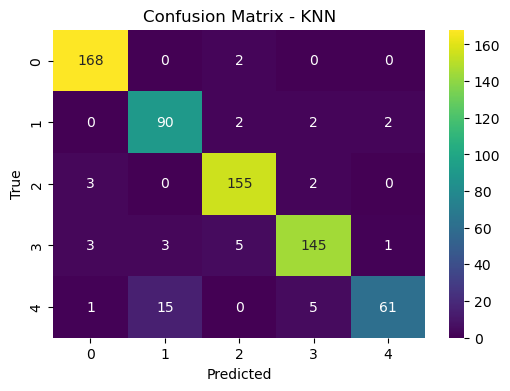

In [24]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Confusion Matrix for Random Forest

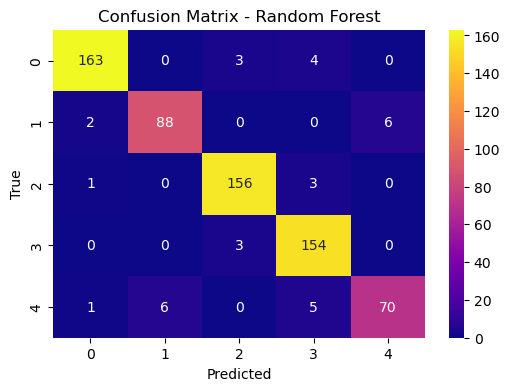

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='plasma')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Feature importance for Random Forest

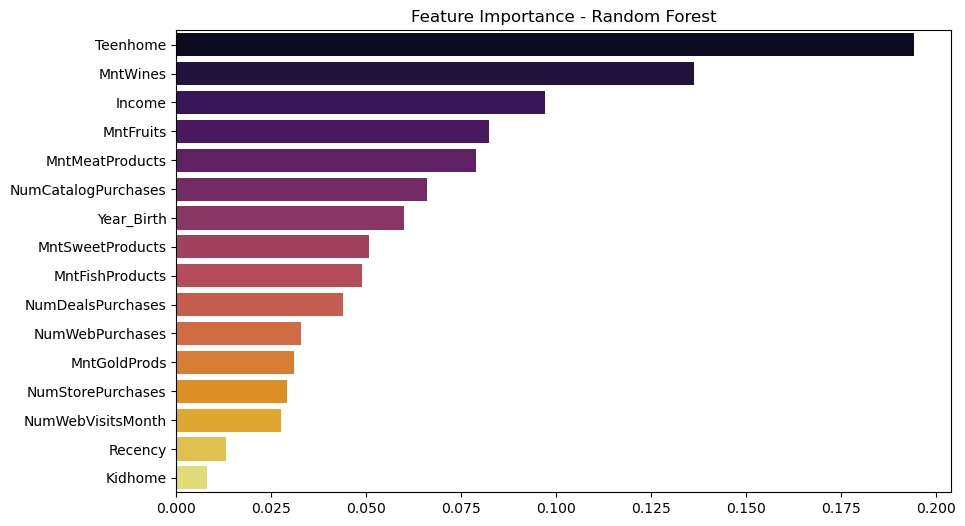

In [28]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="inferno")
plt.show()

## PCA Visualization of Clusters

### Perform PCA to reduce dimensions to 2D for visualization

In [29]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

### Create a DataFrame for PCA results

In [30]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

### Plot PCA results, colored by cluster

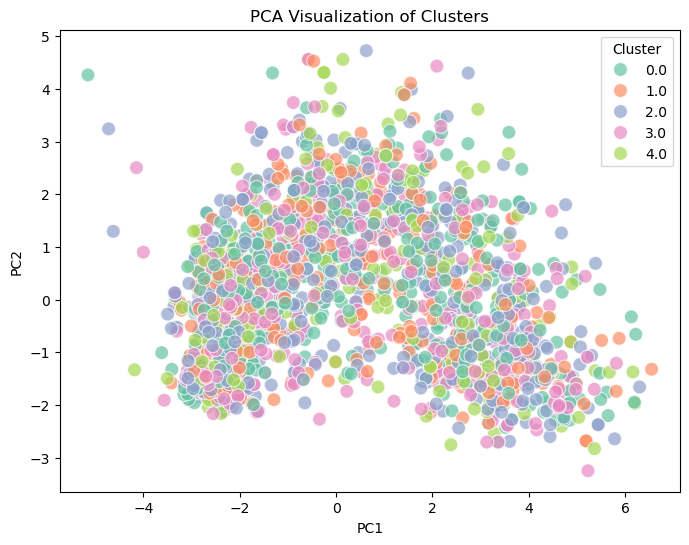

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=100, alpha=0.7)
plt.title('PCA Visualization of Clusters')
plt.show()